### Imports and Configurations

In [1]:
import random
import numpy as np
import keras
import matplotlib.pyplot as plt
import os

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Dense
from keras.models import Model

### Data

In [2]:
dataset_path = "./cats_and_dogs"
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "validation")

### Model

In [3]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(2, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [5]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_test = ImageDataGenerator(rescale=1/255.)

train_generator = data_gen_train.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="categorical")
test_generator = data_gen_test.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode="categorical")

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Train

In [7]:
history = model_new.fit(train_generator, epochs=10, validation_data=test_generator, verbose=1)

Epoch 1/10
7/7 [==============================] - 109s 16s/step - loss: 0.8265 - accuracy: 0.5050 - val_loss: 0.6514 - val_accuracy: 0.6300
Epoch 2/10
7/7 [==============================] - 109s 17s/step - loss: 0.5875 - accuracy: 0.7000 - val_loss: 0.6100 - val_accuracy: 0.6350
Epoch 3/10
7/7 [==============================] - 110s 17s/step - loss: 0.5474 - accuracy: 0.7450 - val_loss: 0.5253 - val_accuracy: 0.7550
Epoch 4/10
7/7 [==============================] - 109s 17s/step - loss: 0.4857 - accuracy: 0.8050 - val_loss: 0.4702 - val_accuracy: 0.8550
Epoch 5/10
7/7 [==============================] - 112s 18s/step - loss: 0.5160 - accuracy: 0.7300 - val_loss: 0.4430 - val_accuracy: 0.8700
Epoch 6/10
7/7 [==============================] - 114s 19s/step - loss: 0.4334 - accuracy: 0.8350 - val_loss: 0.4260 - val_accuracy: 0.8400
Epoch 7/10
7/7 [==============================] - 110s 17s/step - loss: 0.4115 - accuracy: 0.8400 - val_loss: 0.4346 - val_accuracy: 0.8100
Epoch 8/10
7/7 [====

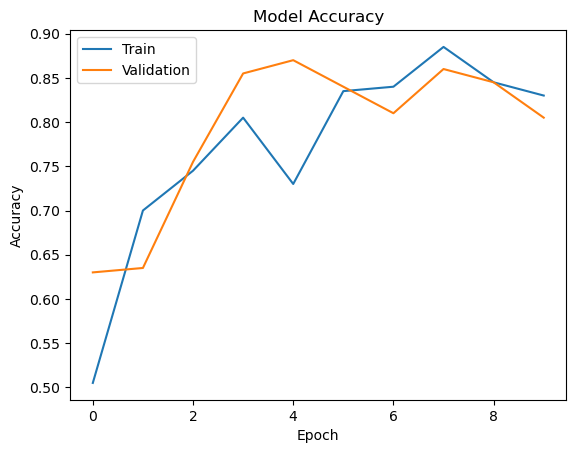

In [8]:
# Plotar as curvas de treinamento e validação
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
# Avaliar o desempenho do modelo nos dados de teste
test_loss, test_acc = model_new.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

7/7 [==============================] - 60s 8s/step - loss: 0.4321 - accuracy: 0.8050
Test accuracy: 0.8050000071525574
